In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\Enzo\\Desktop\\UTSEUS-anjuke-real-estate.csv', index_col=0)

In [7]:
df.head()

,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
id,,,,,,,,,,,,
A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


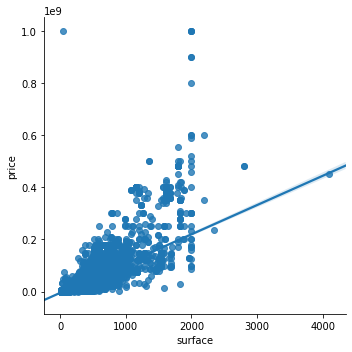

In [8]:
sns.lmplot(x='surface', y='price', data=df)

In [5]:
df['total room']=df.room + df.bedroom

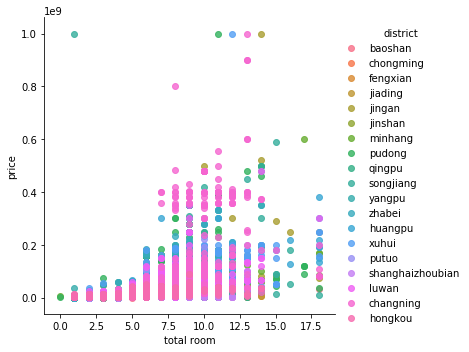

In [20]:
sns.lmplot(x='total room', y='price', data=df, fit_reg=False, hue='district')

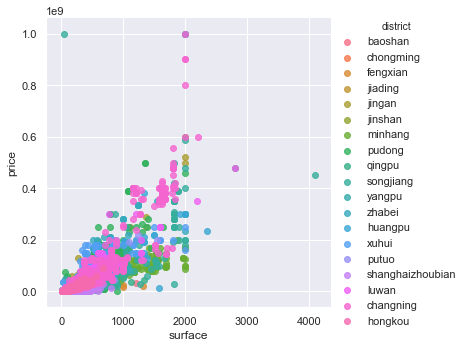

In [6]:
sns.set()
sns.lmplot(x='surface', y='price', data=df, fit_reg=False, hue='district')

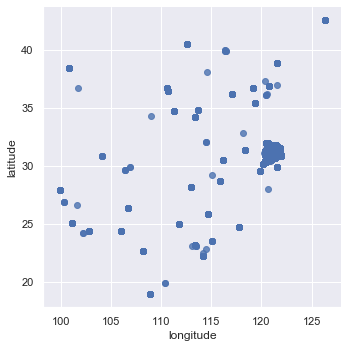

In [36]:
sns.lmplot(x='longitude', y='latitude', data=df, fit_reg=False)

(0, 4351.1443084123775)

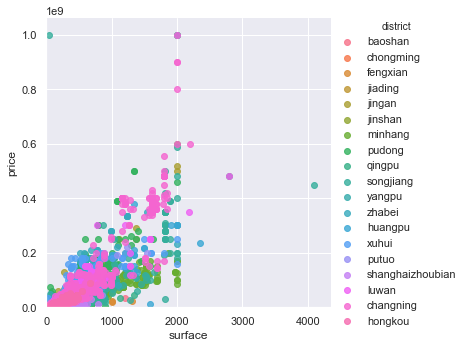

In [25]:
sns.lmplot(x='surface', y='price', data=df, fit_reg=False, hue='district')
plt.ylim(0, None)
plt.xlim(0, None)

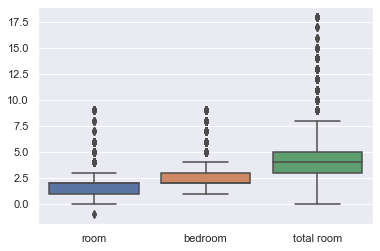

In [28]:
sns.boxplot(data=df[['room','bedroom','total room']])

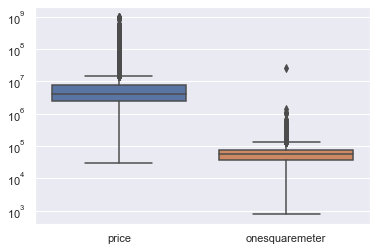

In [34]:
sns.boxplot(data=df[['price','onesquaremeter']])
plt.yscale('log')

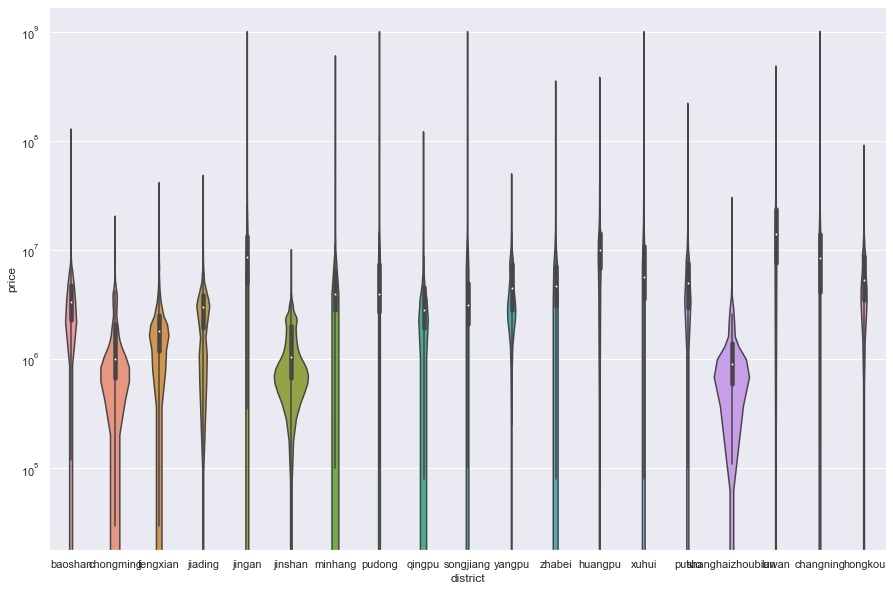

In [39]:
plt.figure(figsize=(15,10))
sns.violinplot(x='district', y='price', data=df)
plt.yscale('log')

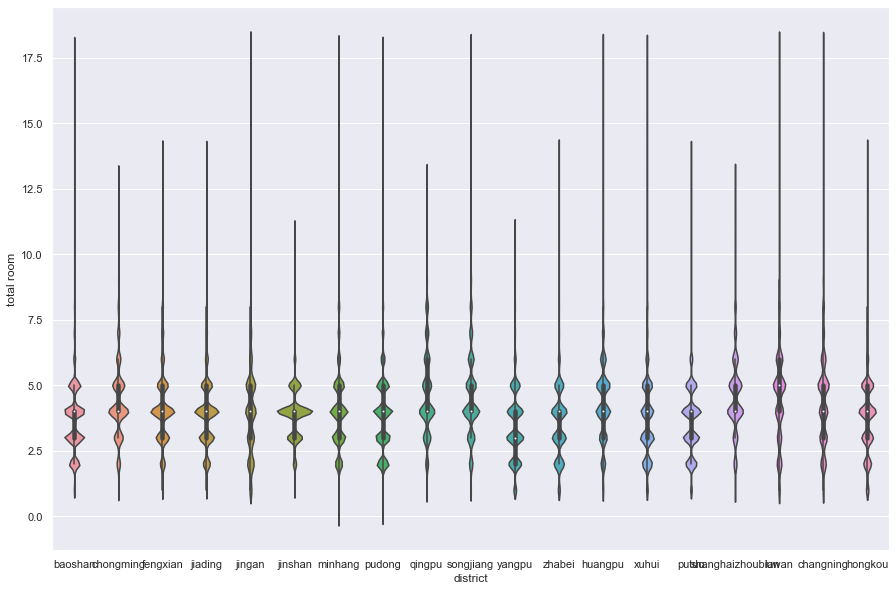

In [43]:
sns.violinplot(x='district', y='total room', data=df)

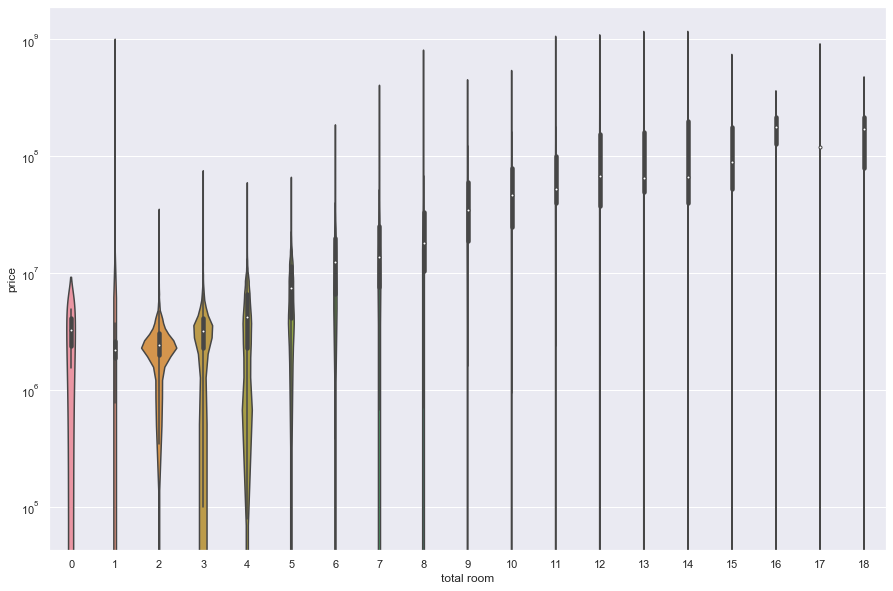

In [45]:
plt.figure(figsize=(15,10))
sns.violinplot(x='total room', y='price', data=df)
plt.yscale('log')

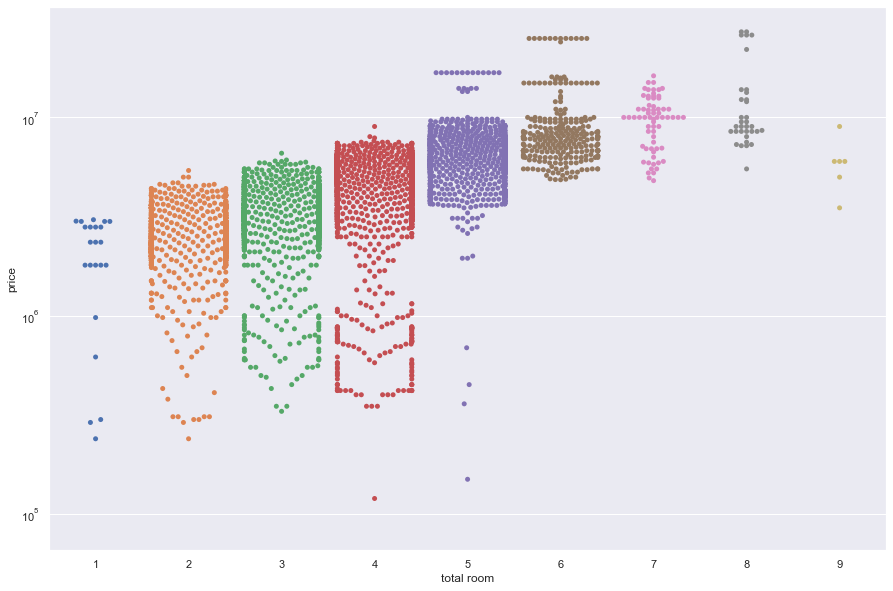

In [9]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='total room', y='price', data=df[:10000])
plt.yscale('log')

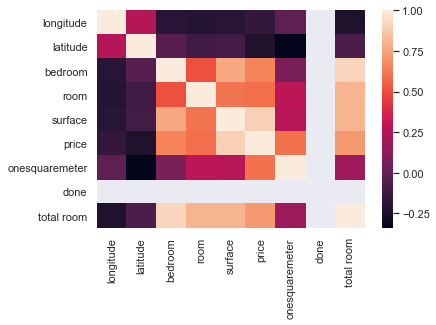

In [11]:
corr = df[:10000].corr()
sns.heatmap(corr)

In [6]:
sns.set()

In [6]:
melted_df = pd.melt(df,id_vars=df.drop(["room","bedroom"],axis=1),var_name="room type")

In [7]:
melted_df.head()

,address,longitude,latitude,surface,price,onesquaremeter,tags,district,neighborhood,done,room type,value
0,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1,bedroom,2
1,宝山-大场 骏华苑,121.407325,31.302368,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1,bedroom,1
2,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1,bedroom,3
3,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1,bedroom,2
4,宝山-大场 美好家小区,121.421397,31.302658,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1,bedroom,2


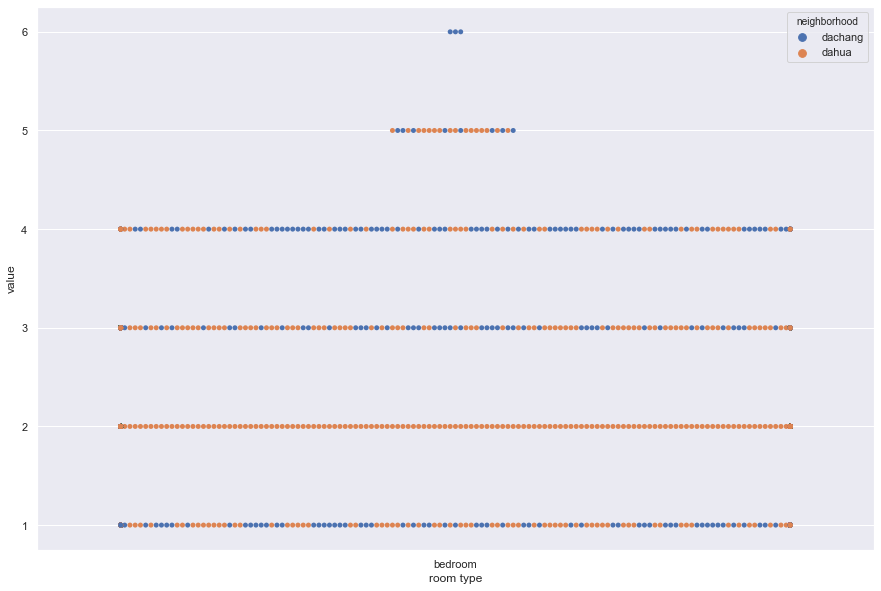

In [14]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='room type', y='value', data=melted_df[:3000], hue='neighborhood')

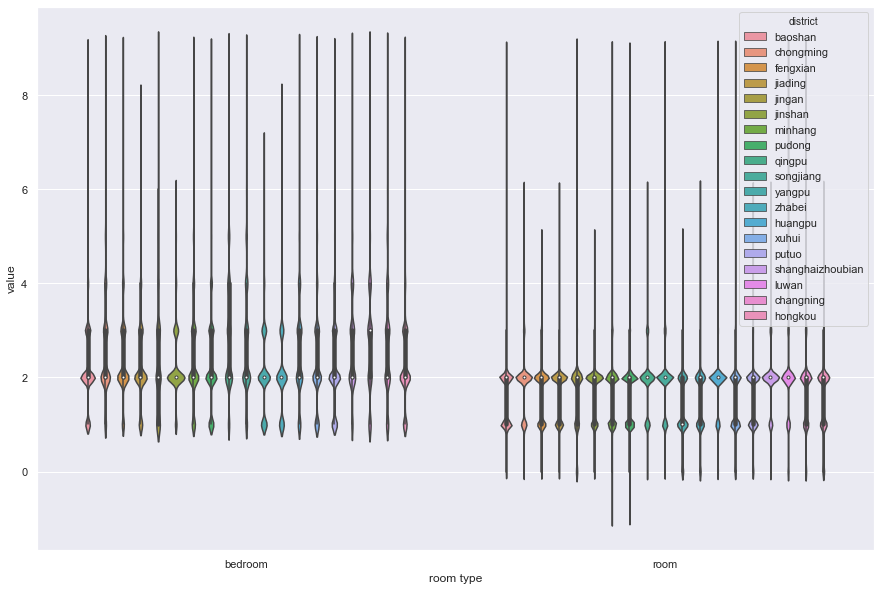

In [11]:
plt.figure(figsize=(15,10))
sns.violinplot(x='room type', y='value', data=melted_df, hue="district")

<Figure size 1080x720 with 0 Axes>

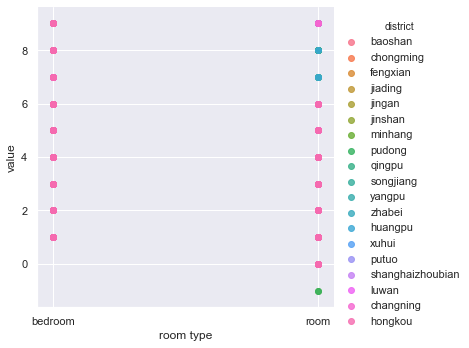

In [13]:
plt.figure(figsize=(15,10))
sns.lmplot(x='room type', y='value', data=melted_df, fit_reg=False, hue="district")

In [6]:
melted_df = pd.melt(df[:2000],id_vars=df.drop(["room","bedroom"],axis=1),var_name="room type")

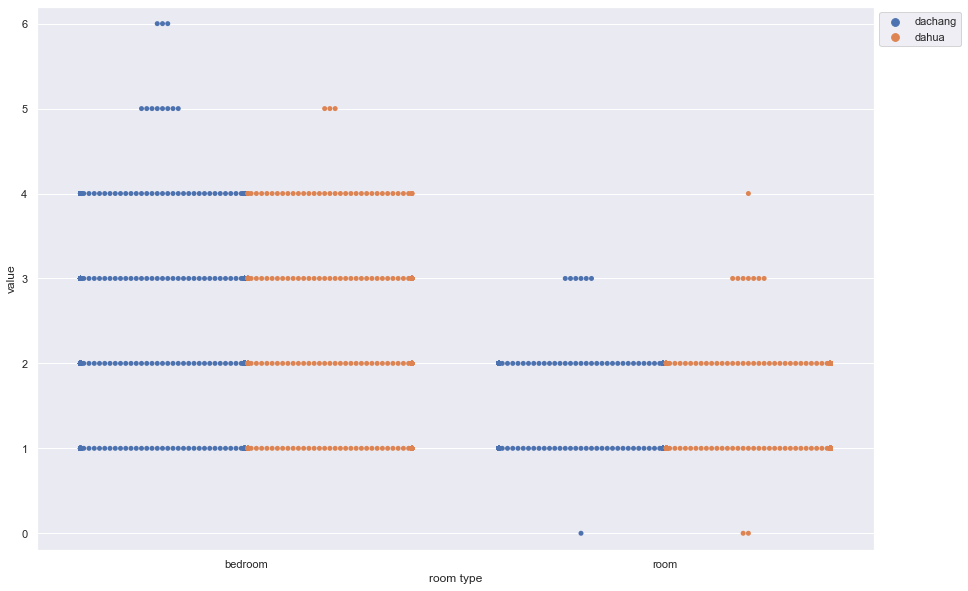

In [9]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='room type', y='value', data=melted_df, hue='neighborhood',dodge=True)
plt.ylim(-0.2, 6.2)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [11]:
corr = (df.drop("done",axis=1)).corr()

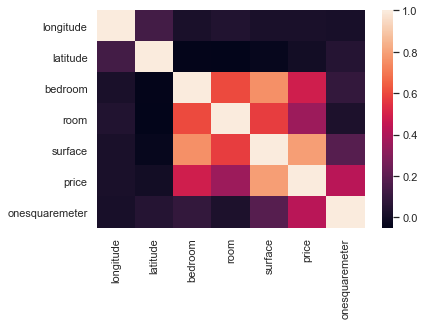

In [12]:
sns.heatmap(corr)

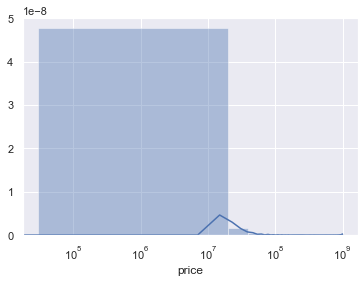

In [14]:
sns.distplot(df.price)
plt.xscale('log')

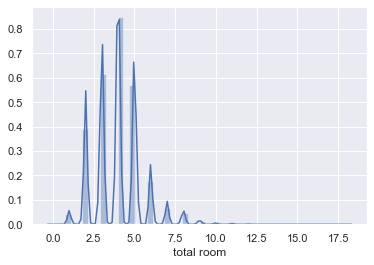

In [24]:
sns.distplot(df["total room"])


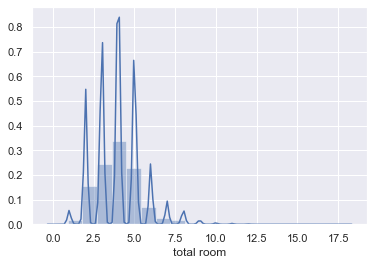

In [27]:
sns.distplot(df["total room"],bins=20)

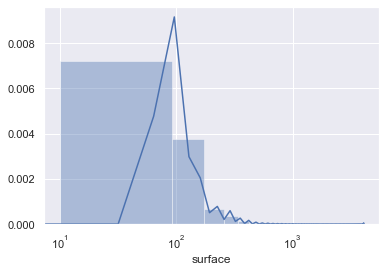

In [30]:
sns.distplot(df["surface"])
plt.xscale("log")

C:\Users\Enzo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


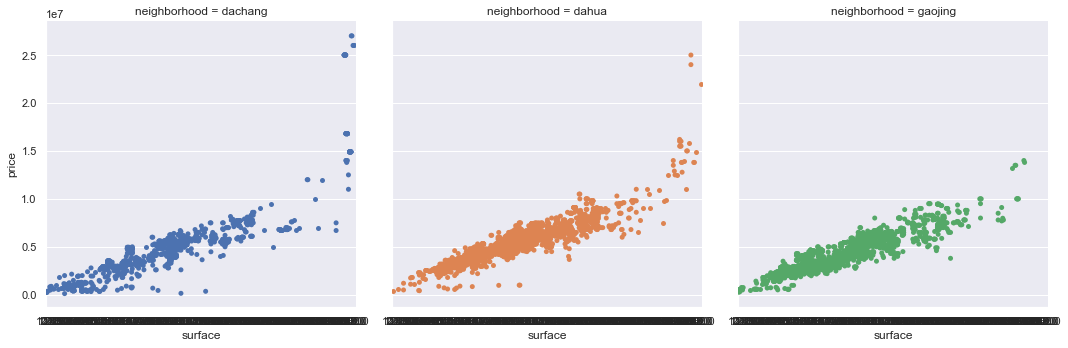

In [7]:
sns.factorplot(x='surface', y='price', data=df[:6000], hue='neighborhood', col='neighborhood', kind='swarm')

(0, 200)

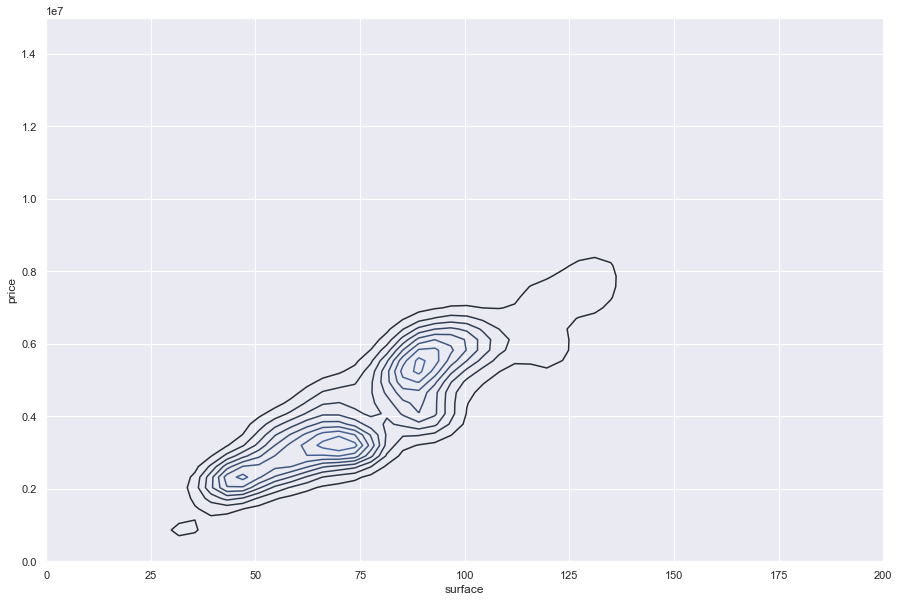

In [21]:
plt.figure(figsize=(15,10))
sns.kdeplot(df[:10000].surface, df[:10000].price)
plt.ylim(0, 15000000)
plt.xlim(0, 200)

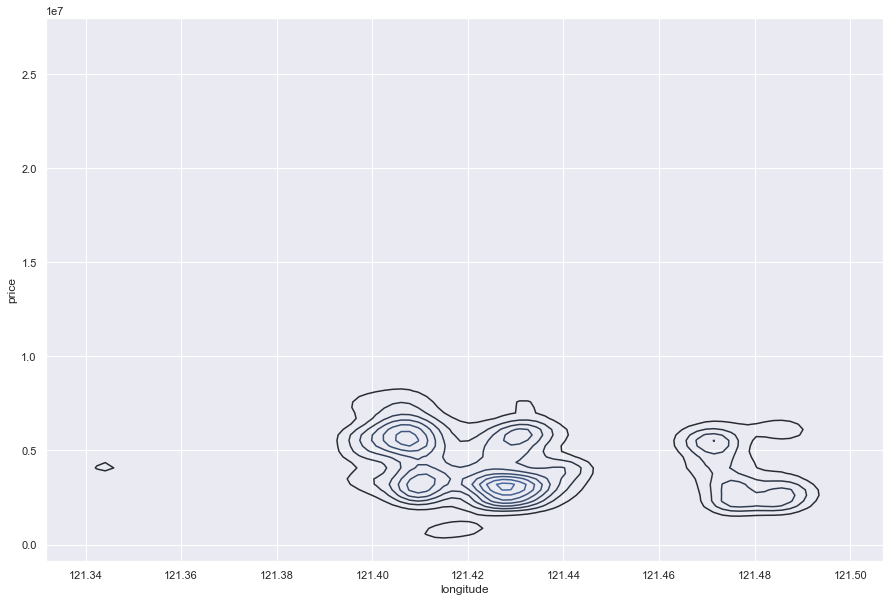

In [15]:
plt.figure(figsize=(15,10))
sns.kdeplot(df[:10000].longitude, df[:10000].price)

<Figure size 1080x720 with 0 Axes>

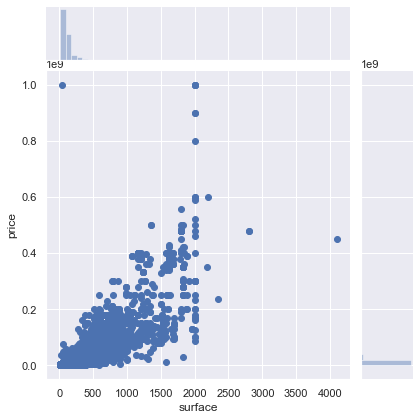

In [19]:
plt.figure(figsize=(15,10))
sns.jointplot(x='surface', y='price', data=df)
